<a href="https://colab.research.google.com/github/EitanBakirov/Advanced-ML-DL-Course/blob/main/Assignment%20II%20-%20NLP/Assignment_II_Group_4_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1><font size=6>Assignment 2 : NLP : Seinfeld or Friends?</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

This project aims to distinguish dialogue lines from the TV shows Seinfeld and Friends. The dataset includes dialogue text, character information, and show labels.

The goal is to build a model trained on dialogues of characters and classifies whether a new dialogue is from Seinfeld or Friends, then evaluate its accuracy on a test set.<br>
Also, we explore the results of the model on each character.

We will build several models, evaluate their performance and choose the best one.
</div>


<div class="markdown-google-sans">
  <h1><font size=5>Data</font></h1>
</div>

The dataset comprises five columns: <br>
- Dialogue - indicating spoken lines<br>
- Character - denoting the speaker <br>
- Episode - specifying the episode number <br>
- Show - identifying the television series <br>
- Dialogue_length - quantifying the length of each dialogue entry.<br><br>

In our models we will only use the features: "Dialouge" (Sample) and "Show" (Label) during the training.<br><br>

<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>[Import Libraries](#scrollTo=-_VBJ0JlYLKI)

>[Loading the data](#scrollTo=kXwOL606ZfUN)

>[EDA & Pre- Processing](#scrollTo=P8cTl07AZgyg)

>>[Text cleaning](#scrollTo=YahuK9cqYcyC)

>>[Special character removal](#scrollTo=rktALPaIYimc)

>>[Stop words removal](#scrollTo=oI-pgoYYYnZe)

>>[Stemming](#scrollTo=Tdei7JlEc_Ea)

>>[Train-Test-Validation split](#scrollTo=mG1TBityfg1-)

>>[Text Representation Techniques](#scrollTo=t5h4TMJDVfw0)

>>>[Bag of Words (BOW)](#scrollTo=8v4hFeBdVXgS)

>>>[Term Frequency-Inverse Document Frequency model (TF-IDF)](#scrollTo=e6VKmyN8W4B1)

>>>[Word embeddings](#scrollTo=YnvKhWctXM6f)

>>[Labeling](#scrollTo=EIruMKat5Rx3)

>>[Text tokenization (for a sequential deep learning model)](#scrollTo=Qcz-Ji7ovJWt)

>>[Sequence padding](#scrollTo=V7kY5N9Hw-31)

>>[Final preprocessing function](#scrollTo=R-LRYdO1lUND)

>[Modeling](#scrollTo=_58J58NQVpBV)

>>[Logistic Regression](#scrollTo=qEiDaFgudEqe)

>>>[BOW](#scrollTo=x2FcL1GTkE_K)

>>>[TF-IDF](#scrollTo=rL5bcMPBkLg4)

>>[Random Forest](#scrollTo=wtFjmtIxdEb2)

>>[Compare models](#scrollTo=BAM267N8Fo-k)

>>[Neural Network](#scrollTo=wA-x7yP2dADC)

>[Explore Our results](#scrollTo=vbjiKHyi7Irm)

>>[Visualization](#scrollTo=gj5MAByiQRWi)

>>[Word Cloud For Each Show](#scrollTo=hZ78JqH4P6Kk)

>[Output](#scrollTo=IJrSf6hnWnCJ)



#  Import Libraries

In [185]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
from sklearn.model_selection import train_test_split

# Contractions expansion of text
!pip install contractions
import contractions

from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import LabelBinarizer

# Tokenizer that contains a stopwords corpus
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

# Progress bar to outputs
from tqdm.notebook import tqdm

# BOW
from sklearn.feature_extraction.text import CountVectorizer
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Sequence padding
from keras.preprocessing import sequence

from sklearn.linear_model import LogisticRegression
import datetime

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier

from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding, MaxPooling1D, BatchNormalization

from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [186]:
# Data Loading for Train
url = 'https://raw.githubusercontent.com/EitanBakirov/Advanced-ML-DL-Course/Eitan-Expanding-Assignment3/Assignment%20II%20-%20NLP/train.csv'
full_train_data = pd.read_csv(url)

In [187]:
# Data Loading for Test
url_test = 'https://raw.githubusercontent.com/EitanBakirov/Advanced-ML-DL-Course/Eitan-Expanding-Assignment3/Assignment%20II%20-%20NLP/test.csv'
full_test_data = pd.read_csv(url_test)

# **EDA & Pre- Processing**

First, let's look at our data:

In [188]:
full_train_data

,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13
...,...,...,...,...,...
70400,Pretty much.,jerry,S05E09,Seinfeld,2
70401,"Oh, well um, not right now. Y'know I’m just g...",phoebe,Season-03 Episode-05-The One With Frank Jr.,Friends,22
70402,"Ooh, I think I wanna trade circles.",phoebe,Season-07 Episode-22-The One With Chandler’s Dad,Friends,7
70403,"Hey, hey, what is this? What's going on here?",jerry,S05E03,Seinfeld,9


Before moving on looking at the data, let's check for missing values:

In [189]:
# Train set
missing_values_count = full_train_data.isnull().sum()
print("Missing values count per column in train data:")
print(missing_values_count)

Missing values count per column in train data:
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64


In [190]:
# Test set
missing_values_count = full_test_data.isnull().sum()
print("Missing values count per column in test data:")
print(missing_values_count)

Missing values count per column in test data:
Dialogue           0
Character          0
Episode            0
Show               0
Dialogue_length    0
dtype: int64


No missing values found!

Checking whether the train data is balanced:

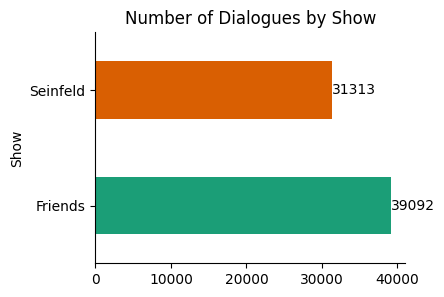

In [191]:
# Grouping by 'Show' and getting size
grouped_data = full_train_data.groupby('Show').size()

plt.figure(figsize=(4, 3))  # Adjust width and height as needed

# Plotting the grouped data
ax = grouped_data.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adding count numbers near the plots with slight adjustments
for i, count in enumerate(grouped_data):
    ax.text(count + 0.1, i, str(count), va='center', ha='left')

# Adding title
plt.title("Number of Dialogues by Show")

plt.show()

In [192]:
# Display the character count per show
full_train_data.groupby('Show')['Character'].nunique()

Show
Friends     6
Seinfeld    4
Name: Character, dtype: int64

Looks like "Friends" has sligthly more dialouges than "Seinfeld", but overall it looks pretty balanced. <br>
(Based on the fact that in Friends show there are more characters than in Seinfeld - 6 vs 4)

Therefore we are expecting to see better results for "Friends" since there are more samples to learn from.

In [193]:
# Dialouge exmaple
full_train_data.iloc[1, 0]

' (to Joey) Are you gonna be embarrassed going up there having nothing prepared?'

Let's look at the number of dialogues each character has in its show:

In [194]:
# Define a function to plot histogram with count numbers
def plot_histogram_with_counts(ax, data, title, xlabel, ylabel, color):
    bars = ax.bar(data.index, data.values, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(data.index)
    ax.set_xticklabels(data.index, rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # Adding count numbers above each column
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')


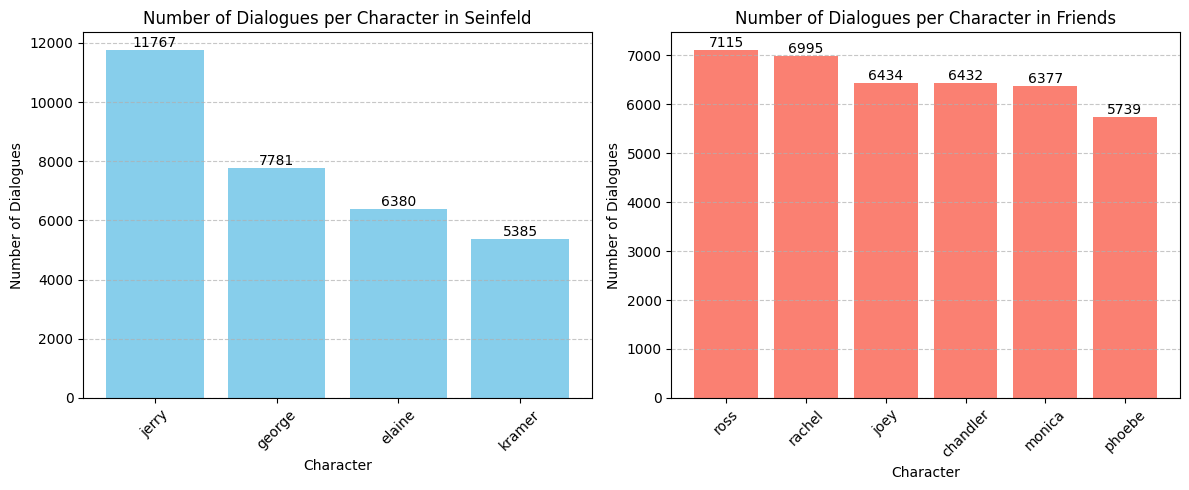

In [195]:
# Filter data for Seinfeld
seinfeld_df = full_train_data[full_train_data['Show'] == 'Seinfeld']
# Group by character and count dialogues
seinfeld_character_counts = seinfeld_df['Character'].value_counts()
seinfeld_characters = seinfeld_character_counts.index.tolist()

# Filter data for Friends
friends_df = full_train_data[full_train_data['Show'] == 'Friends']
# Group by character and count dialogues
friends_character_counts = friends_df['Character'].value_counts()
friends_characters = friends_character_counts.index.tolist()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Seinfeld
plot_histogram_with_counts(axes[0], seinfeld_character_counts, 'Number of Dialogues per Character in Seinfeld', 'Character', 'Number of Dialogues', 'skyblue')

# Plot histogram for Friends
plot_histogram_with_counts(axes[1], friends_character_counts, 'Number of Dialogues per Character in Friends', 'Character', 'Number of Dialogues', 'salmon')

plt.tight_layout()
plt.show()

We can see that: <br>
Seinfeld - Jerry has much more dialogues than the others. <br>
Friends - the number of dialogues is more balanced.

In [196]:
# Dialogues Length Distribution
# Plotting the distribution of dialogue lengths for each show to understand the typical length of dialogues
def plot_dialogue_length_distribution(data, show_names):
    plt.figure(figsize=(10, 6))

    for show_name in show_names:
        show_data = data[data['Show'] == show_name]
        dialogue_lengths = show_data['Dialogue'].apply(lambda x: len(x.split()))
        plt.hist(dialogue_lengths, bins=30, alpha=0.5, label=show_name)

    plt.title('Dialogue Length Distribution Comparison')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.legend()
    plt.show()

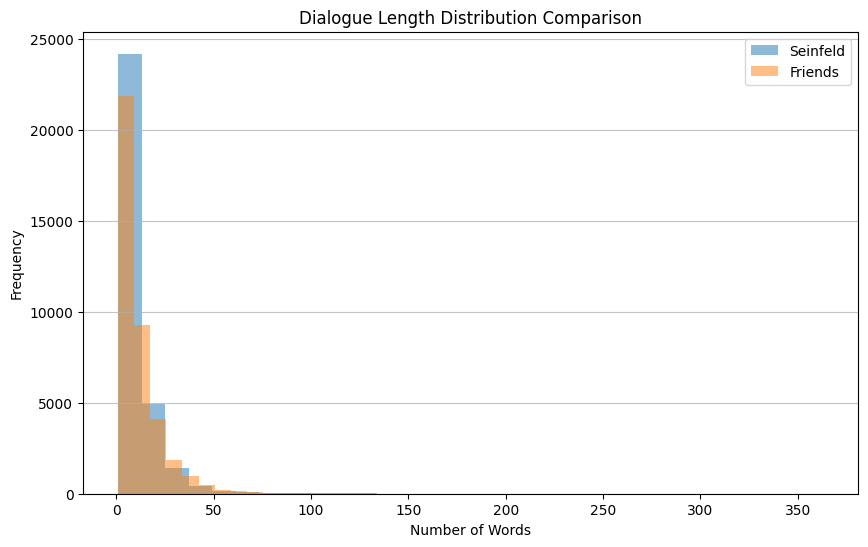

In [197]:
plot_dialogue_length_distribution(full_train_data, ['Seinfeld', 'Friends'])

We can see that most of the sentences are short at both shows.

In [198]:
# Function that finds the most common words
def count_words_custom(col):
    # Create an empty dictionary to store word counts
    word_counts = {}

    # Iterate over each row in the column
    for row in col:
        # Convert dialogue to lowercase and split into words
        words = row.lower().split()

        # Iterate over each word in the row
        for word in words:
            # Update word count dictionary
            word_counts[word] = word_counts.get(word, 0) + 1

    # Sort word counts by value in descending order
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract top 20 words and their counts
    top_words = [word for word, count in sorted_word_counts[:20]]
    top_counts = [count for word, count in sorted_word_counts[:20]]

    # Plot bar chart
    plt.figure(figsize=(15, 5))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 20 Most Common Words')
    plt.xticks(rotation=45)
    plt.show()

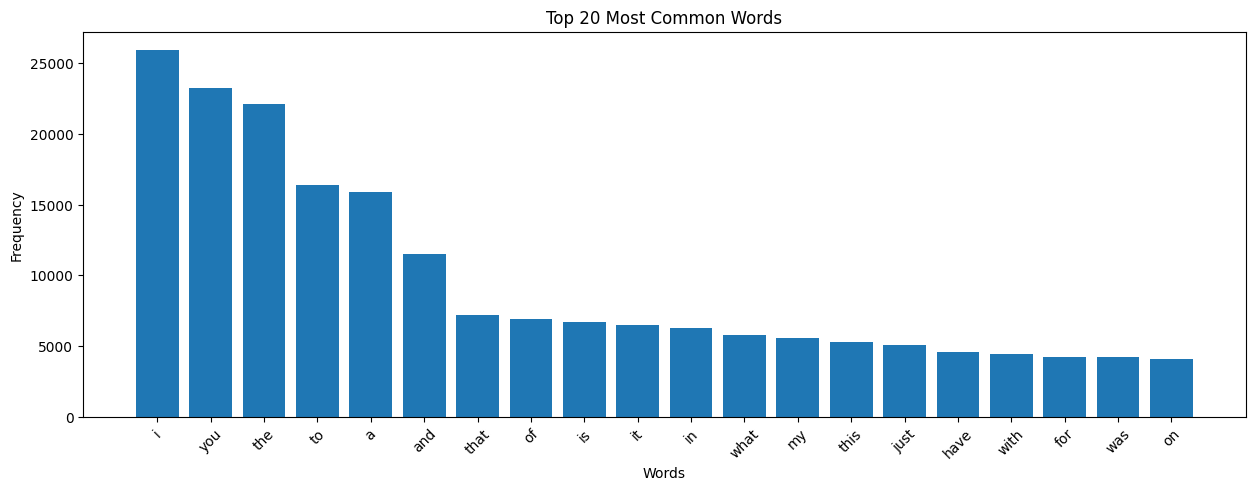

In [199]:
count_words_custom(full_train_data['Dialogue'])

We can see that all the most common words are Stop Words. We want to see the frequency without them.

For that we will implement data preprocessing steps:

## Text cleaning

In [200]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [201]:
# Expanding contractions
def expand_contractions(text):
    return(contractions.fix(text))

In [202]:
# A function for removing special characters and expanding contractions
def clean_text(text):
  text = remove_between_square_brackets(text)
  text = expand_contractions(text)
  return text

In [203]:
# Apply function on 'Dialogue' column
full_train_data['Dialogue'] = full_train_data['Dialogue'].apply(clean_text)
full_test_data['Dialogue'] = full_test_data['Dialogue'].apply(clean_text)

In [204]:
full_train_data.iloc[1, 0]

' (to Joey) Are you going to be embarrassed going up there having nothing prepared?'

## Special character removal

In [205]:
# A function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

In [206]:
# Apply function on Dialogue column
full_train_data['Dialogue'] = full_train_data['Dialogue'].apply(remove_special_characters)
full_test_data['Dialogue'] = full_test_data['Dialogue'].apply(remove_special_characters)

In [207]:
full_train_data.iloc[1, 0]

' to Joey Are you going to be embarrassed going up there having nothing prepared'

## Stop words removal

We will use the NLTK in order to find all the English stop words and take a look at a few of them:

In [208]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))
print(stopword_list[:5])

Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
# Adding a progress bar to the output
tqdm.pandas()

# A function that removes the stop words from a given text
def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [210]:
# Apply function on Dialogue column
full_train_data['Dialogue'] = full_train_data['Dialogue'].progress_apply(remove_stopwords)
full_test_data['Dialogue'] = full_test_data['Dialogue'].progress_apply(remove_stopwords)

  0%|          | 0/70405 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

In [211]:
full_train_data.iloc[1, 0]

'Joey going embarrassed going nothing prepared'

Now we can run the word count again and see the desired plotting:

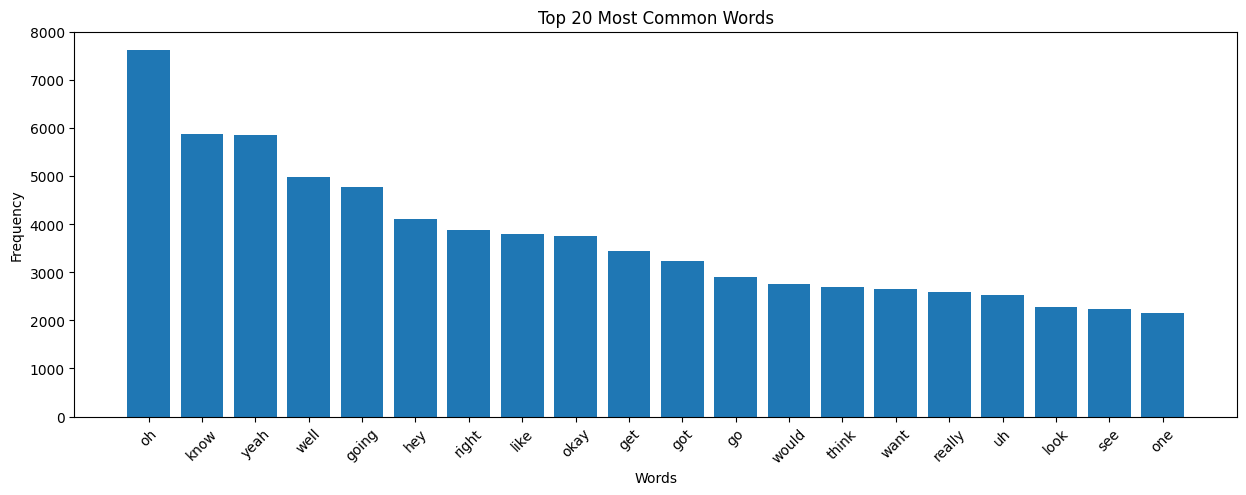

In [212]:
count_words_custom(full_train_data['Dialogue'])

Now we can see that there are no more stop words from the english corpus left.

## Stemming

In [213]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [214]:
# Apply function on Dialogue column
full_train_data['Dialogue'] = full_train_data['Dialogue'].progress_apply(simple_stemmer)
full_test_data['Dialogue'] = full_test_data['Dialogue'].progress_apply(simple_stemmer)

  0%|          | 0/70405 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

In [215]:
full_train_data.iloc[1, 0]

'joey go embarrass go noth prepar'

## Train-Test-Validation split

In [216]:
X_train = full_train_data['Dialogue']
X_test = full_test_data['Dialogue']
y_train = full_train_data['Show']
y_test = full_test_data['Show']

In [217]:
# Train-Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_original = X_train.copy()
y_train_original = y_train.copy()

X_val_original = X_val.copy()
y_val_original = y_val.copy()

X_test_original = X_test.copy()
y_test_original = y_test.copy()

print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nx_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print('\nx_val shape:', X_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (56324,)
y_train shape: (56324,)

x_test shape: (4245,)
y_test shape: (4245,)

x_val shape: (14081,)
y_val shape: (14081,)


## Text Representation Techniques

In this section we will name all the text representation techniques that we will use and implement them:

Our aim is to make the representation of text in the model to be as meaningful, capturing important information such as word frequencies, semantic relationships, and contextual meaning.

### Bag of Words (BOW)

<u>Positives:</u>

1. Simple and Intuitive: BOW is easy to understand and implement, making it accessible for beginners and quick to deploy in NLP projects.

2. Efficient: It requires minimal computational resources for both training and inference, making it suitable for large datasets and real-time applications.

3. Versatility: BOW can be used with various machine learning algorithms, including traditional classifiers, making it applicable to a wide range of NLP tasks such as sentiment analysis, text classification, and document clustering.

<u>Negatives:</u>

1. Loss of Sequence Information: BOW disregards the order of words in the document, leading to the loss of sequential information. This can result in the model's inability to capture context and dependencies between words accurately.

2. Sparse Representation: For large vocabularies or datasets with many unique words, the BOW representation can become highly sparse, leading to increased computational and memory requirements and potentially causing issues with model overfitting.

In [218]:
def BOW_implementation(x_train, x_val, x_test):

  cv = CountVectorizer(analyzer='word')

  x_train_cv = cv.fit_transform(x_train)
  x_val_cv = cv.transform(x_val)
  x_test_cv = cv.transform(x_test)

  return x_train_cv, x_val_cv, x_test_cv

In [219]:
# x_train_cv, x_val_cv, x_test_cv = BOW_implementation(x_train, x_val, x_test)

# print('x_train_cv:', x_train_cv.shape)
# print('x_test_cv:', x_test_cv.shape)
# print('x_val_cv:', x_val_cv.shape)

### Term Frequency-Inverse Document Frequency model (TF-IDF)

<u>Positives:</u>

1. Term Importance: TF-IDF considers not only the frequency of words in the document but also their importance across the entire corpus. This helps in identifying and giving more weight to words that are rare but have significant meaning, improving the model's ability to capture important terms.

2. Dimensionality Reduction: TF-IDF reduces the dimensionality of the feature space by weighting words based on their importance, resulting in a more compact representation compared to BOW. This can improve model efficiency and reduce computational complexity.

3. Generalization: TF-IDF helps in generalizing the model by down-weighting common terms that appear frequently across documents but may not carry significant semantic meaning, leading to better model performance on unseen data.

<u>Negatives:</u>

1. Loss of Semantic Information: Like BOW, TF-IDF also ignores the order and context of words in the document, leading to the loss of semantic information. It treats each document as a collection of independent words, which may not accurately capture the document's overall meaning.

2. Sensitivity to Document Length: TF-IDF may be sensitive to document length, as longer documents may have higher term frequencies, potentially biasing the model towards longer documents.

This is another way to convert the data to a numerical format. Like BoW, this algorithm is based on a term's popularity. However, its score is negatively correlated with its popularity in all documents.

This time we're going to use only 5K different terms as a cut-off.

In [220]:
def tfidf_implementation(x_train, x_val, x_test):

  tv = TfidfVectorizer(analyzer='word', max_features=5000)

  x_train_tv = tv.fit_transform(x_train)
  x_val_tv = tv.transform(x_val)
  x_test_tv = tv.transform(x_test)

  return x_train_tv, x_val_tv, x_test_tv

In [221]:
# x_train_tv, x_val_tv, x_test_tv = tfidf_implementation(x_train, x_val, x_test)

# print('x_train_tv:', x_train_tv.shape)
# print('x_test_tv:', x_test_tv.shape)
# print('x_val_tv:', x_val_tv.shape)

### Word embeddings

Word embeddings capture semantic relationships between words and provide a more nuanced representation of the text data compared to BOW and TF-IDF.

The implementation will be a layer during the creation of the architecture and training of the final model.

## Labeling

We will change the labels "Friends" and "Seinfeld" to 1 and 0 accordingly:

In [222]:
# Making sure that there are only two unique labels
unique_shows = full_train_data['Show'].unique()
print("Unique values in the 'show' column:")
print(unique_shows)

Unique values in the 'show' column:
['Friends' 'Seinfeld']


As we saw above - we have only 2 values in 'Show' columns : Friends and Seindfeld. <br>
Therefore we will change our label into binary numbers : Seinfeld = 0 , Friends = 1

In [223]:
# custom_labels = ['Seinfeld', 'Friends']
def labeling_implementation(y_train, y_val, y_test):

  # Initialize LabelBinarizer
  lb = LabelBinarizer()

  # Fit and transform custom labels
  y_train = lb.fit_transform(y_train)
  y_val = lb.transform(y_val)
  y_test = lb.transform(y_test)

  return y_train, y_val, y_test

In [224]:
y_train, y_val, y_test = labeling_implementation(y_train, y_val, y_test)
y_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

## Text tokenization (for a sequential deep learning model)

For our deep learning model we will convert the text data into a suitable format of data (numeric form) using the Keras' tokenizer:

In [225]:
X_train_before_token = X_train

In [226]:
token = Tokenizer(lower=False)
token.fit_on_texts(X_train)

In [227]:
def text_tokenization(X_train, X_val, X_test):

  token = Tokenizer(lower=False)
  token.fit_on_texts(X_train)

  X_train_dl = token.texts_to_sequences(X_train)
  X_val_dl = token.texts_to_sequences(X_val)
  X_test_dl = token.texts_to_sequences(X_test)

  return X_train_dl, X_val_dl, X_test_dl

In [228]:
X_train, X_val, X_test = text_tokenization(X_train, X_val, X_test)

Before:

In [229]:
X_train_before_token[1]

'joey go embarrass go noth prepar'

After:

In [230]:
token.texts_to_sequences([X_train_before_token[1]])

[[35, 1, 607, 1, 99, 1282]]

## Sequence padding

In order to train our Neural Network, we need the dataset to be with a fixed amount of features (in our case - words\tokens). Thus, we will apply padding  on the data.

Calculate dialouge lengths:

In [231]:
# Calculate the dialouge length
dialouge_len_list = [len(dialouge) for dialouge in X_train]

print ("Longest dialouge:", max(dialouge_len_list))
print("Shortet dialouge: ", min(dialouge_len_list))
print("Average dialouge:", np.mean(dialouge_len_list))

Longest dialouge: 166
Shortet dialouge:  0
Average dialouge: 5.3504012499112275


Let's examine the distribution:

<Axes: ylabel='Count'>

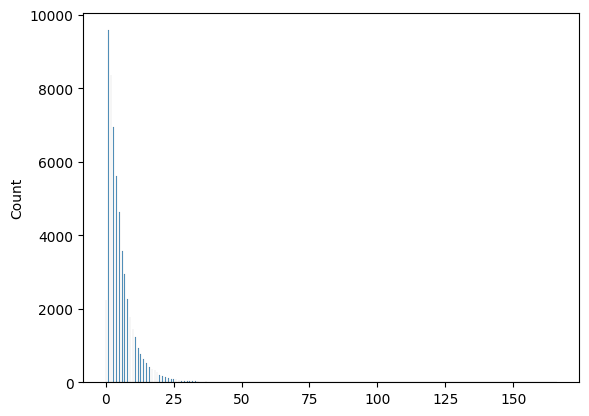

In [232]:
sns.histplot(dialouge_len_list)

We want to make sure that all dialouges have the same length. According to the distribution, 40 seems like a reasonable shared value:

In [233]:
max_words = 40

In [234]:
def sequence_padding(X_train, X_val, X_test, max_words):

  X_train_dl = sequence.pad_sequences(X_train, maxlen=max_words)
  X_val_dl = sequence.pad_sequences(X_val, maxlen=max_words)
  X_test_dl = sequence.pad_sequences(X_test, maxlen=max_words)

  return X_train_dl, X_val_dl, X_test_dl

In [235]:
X_train, X_val, X_test = sequence_padding(X_train, X_val, X_test, max_words)

Let's see what a sample look like:

In [236]:
X_train.shape

(56324, 40)

In [237]:
X_train[10, :]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  268,  247,  340,  834,
          3, 4205, 4885,  159,    3,   52,  340], dtype=int32)

In [238]:
total_words = len(token.word_index) + 1
print("Number of unique words in both shows after preprocessing:", total_words)

Number of unique words in both shows after preprocessing: 15576


## Final preprocessing function

As discussed earlier, there are 3 different approaches of text representation, thus, we need to preprocess accordingly:

Starting with the general features preprocessing:

In [239]:
def features_preproccesing(X_original):

  # Text cleaning
  X_original = X_original.apply(clean_text)

  # Special character removal
  X_original = X_original.apply(remove_special_characters)

  # Stop words removal
  X_original = X_original.progress_apply(remove_stopwords)

  # Stemming
  X_original = X_original.progress_apply(simple_stemmer)

  return X_original

Applying these changes to each dataset and encoding the labels as decicded:

In [240]:
def final_preprocessing(X_train_original, y_train_original, X_val_original, y_val_original, X_test_original, y_test_original):

  print("X_train preprocessing:")
  X_train_original = features_preproccesing(X_train_original)

  print("\nX_val preprocessing:")
  X_val_original = features_preproccesing(X_val_original)

  print("\nX_test preprocessing:")
  X_test_original = features_preproccesing(X_test_original)

  y_train_original, y_val_original, y_test_original = labeling_implementation(y_train_original, y_val_original, y_test_original)

  print("\nFull preprocessing done!")

  return X_train_original, y_train_original, X_val_original, y_val_original, X_test_original, y_test_original

In [241]:
X_train_ppc, y_train_ppc, X_val_ppc, y_val_ppc, X_test_ppc, y_test_ppc = final_preprocessing(X_train_original.copy(), y_train_original.copy(), X_val_original.copy(), y_val_original.copy(), X_test_original.copy(), y_test_original.copy())

X_train preprocessing:


  0%|          | 0/56324 [00:00<?, ?it/s]

  0%|          | 0/56324 [00:00<?, ?it/s]


X_val preprocessing:


  0%|          | 0/14081 [00:00<?, ?it/s]

  0%|          | 0/14081 [00:00<?, ?it/s]


X_test preprocessing:


  0%|          | 0/4245 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]


Full preprocessing done!


After we have the basic preprocessed data we should prepare the data for BOW representation, TF-IDF represantation and the convolutional neural network:

In [242]:
def deep_learning_preprocessing(X_train, X_val, X_test, max_words):

  X_train_dl, X_val_dl, X_test_dl = text_tokenization(X_train, X_val, X_test)
  X_train_dl, X_val_dl, X_test_dl = sequence_padding(X_train_dl, X_val_dl, X_test_dl, max_words)

  return X_train_dl, X_val_dl, X_test_dl

In [243]:
X_train_dl, X_val_dl, X_test_dl = deep_learning_preprocessing(X_train_ppc.copy(), X_val_ppc.copy(), X_test_ppc.copy(), max_words)

In [244]:
x_train_cv, x_val_cv, x_test_cv = BOW_implementation(X_train_ppc.copy(), X_val_ppc.copy(), X_test_ppc.copy())

In [245]:
x_train_tv, x_val_tv, x_test_tv = tfidf_implementation(X_train_ppc.copy(), X_val_ppc.copy(), X_test_ppc.copy())

# Modeling

In this section we will run several Machine Learning and Deep Learning models with different types of text-representation techniques (BOW, TF-IDF and word embedding)

## Logistic Regression

### BOW

In [246]:
def bow_logistic_regression(x_train_cv, y_train):

  begin_time = datetime.datetime.now()
  lr_bow = LogisticRegression(penalty='l2', max_iter=500, random_state=42)
  lr_bow.fit(x_train_cv, y_train.ravel())
  print('BOW time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

  return lr_bow

### TF-IDF

In [247]:
def tfidf_logistic_regression(x_train_tv, y_train):

  begin_time = datetime.datetime.now()
  lr_tfidf = LogisticRegression(penalty='l2', max_iter=500, random_state=42)
  lr_tfidf.fit(x_train_tv, y_train.ravel())
  print('TFIDF time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

  return lr_tfidf

We see that the cut-off TF-IDF is much faster. Let's evaluate the two methods:

In [248]:
def evaluate(model, model_name, x, y, scores_dict=None, roc_dict=None):

  y_pred = model.predict(x)
  y_pred_proba = model.predict_proba(x)[:, 1]

  scores_dict[model_name] = {}
  scores_dict[model_name]['AUC'] = roc_auc_score(y, y_pred_proba)
  scores_dict[model_name]['Accuracy'] =  accuracy_score(y, y_pred)

  roc_dict[model_name] = {}
  roc_dict[model_name]['FPR'], roc_dict[model_name]['TPR'], _ = roc_curve(y, y_pred_proba)

  return scores_dict

In [249]:
scores_dict = {}
roc_dict = {}

In [250]:
# evaluate(lr_bow, 'logistic_bow', x_test_cv, y_test, scores_dict, roc_dict)['logistic_bow']['Accuracy']

In [251]:
# evaluate(lr_tfidf, 'logistic_tfidf', x_test_tv, y_test, scores_dict, roc_dict)['logistic_tfidf']['Accuracy']

And we see that their accuracy is very similar, despite the fact that we used only 5K terms in the TF-IDF.

## Random Forest

### BOW

In [252]:
def bow_random_forest(x_train_cv, y_train):

  begin_time = datetime.datetime.now()
  rf_bow = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=1/3, max_depth=5, n_estimators=100)
  rf_bow.fit(x_train_cv, y_train.ravel())
  print('BOW time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

  return rf_bow

### TF-IDF

In [253]:
def tfidf_random_forest(x_train_tv, y_train):

  begin_time = datetime.datetime.now()
  rf_tfidf = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=1/3, max_depth=5, n_estimators=100)
  rf_tfidf.fit(x_train_tv, y_train.ravel())
  print('TFIDF time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

  return rf_tfidf

In [254]:
# evaluate(rf_bow, 'rf_bow', x_test_cv, y_test, scores_dict, roc_dict)['rf_bow']['Accuracy']

In [255]:
# evaluate(rf_tfidf, 'rf_tfidf', x_test_tv, y_test, scores_dict, roc_dict)['rf_tfidf']['Accuracy']

And it performs worse than the standard logistic regression.

## Convolutional Neural Network with an Embedding Layer

Let's build the architecture:

 Building an architecture of a convolutional neural network (CNN) implemented using Keras. <br>
After having experiments with the model architecture we found that the best one consists : <br>
a Sequential model to define a linear stack of layers, <br>
 an Embedding Layer that converts input integer sequences into dense vectors,  <br>
 two Conv1D layers with different filter sizes and activation functions to capture local patterns in the text, <br>
 a Flatten Layer to prepare the output for the dense layers, <br>
Dense Layers with ReLU activation and a Dropout layer to prevent overfitting,
<br> and a final Dense layer with sigmoid activation for binary classification.
<br> The model is compiled using binary crossentropy loss and Adam optimizer, which adjusts learning rates for each parameter.

In [256]:
# Define the model
model = Sequential()
embedding_dimension = 32
model.add(Embedding(input_dim=total_words, output_dim=embedding_dimension, input_length=max_words))
model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
loss_function = 'binary_crossentropy'
model_optimizer = 'adam'
model.compile(loss=loss_function, optimizer=model_optimizer, metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 32)            498432    
                                                                 
 conv1d_14 (Conv1D)          (None, 40, 16)            1552      
                                                                 
 conv1d_15 (Conv1D)          (None, 40, 128)           6272      
                                                                 
 flatten_7 (Flatten)         (None, 5120)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               655488    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [257]:
# Get the number of trainable parameters
trainable_params = model.count_params()

print("Number of Trainable Parameters:", trainable_params)

Number of Trainable Parameters: 1161873


In [259]:
num_of_epochs = 2
history = model.fit(X_train, y_train, validation_data=(X_val_dl, y_val_ppc), epochs=num_of_epochs, batch_size=64)

Epoch 1/2
881/881 [==============================] - 23s 26ms/step - loss: 0.3741 - accuracy: 0.8038 - val_loss: 0.8229 - val_accuracy: 0.6361
Epoch 2/2
881/881 [==============================] - 27s 30ms/step - loss: 0.3246 - accuracy: 0.8296 - val_loss: 0.9746 - val_accuracy: 0.6320


In [260]:
# Accessing the training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
print("Training Set Accuracy:", train_accuracy)

Training Set Accuracy: 0.8296108245849609


In [261]:
# Get the number of layers in the model
num_layers = len(model.layers)
print("Number of Layers:", num_layers)

Number of Layers: 7


In [275]:
def embedding_conv_net(X_train, y_train, X_val, y_val):

  begin_time = datetime.datetime.now()

  # Define the model
  model = Sequential()
  embedding_dimension = 32
  model.add(Embedding(input_dim=total_words, output_dim=embedding_dimension, input_length=max_words))
  model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='relu'))
  model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  # # Print the model summary
  # model.summary()

  # Compile the model
  loss_function = 'binary_crossentropy'
  model_optimizer = 'adam'
  model.compile(loss=loss_function, optimizer=model_optimizer, metrics=['accuracy'])

  # Train the model
  num_of_epochs = 2
  model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_of_epochs, batch_size=64)

  print('Convolutional Neural Network time (seconds): ', str((datetime.datetime.now() - begin_time).seconds))

  return model

Let's evaluate our model:

In [263]:
best_model_accuracy = model.evaluate(X_test, y_test)[1]
print("Model evaluation (accuracy):", best_model_accuracy)

133/133 [==============================] - 0s 3ms/step - loss: 0.5354 - accuracy: 0.8247
Model evaluation (accuracy): 0.8247349858283997


# Run all models

In [272]:
def run_all_models(x_train_cv, x_train_tv, y_train, x_train_dl, X_val_dl, y_val):

  models_dict = {}

  print("---------------------------\nLogistic Regression:\n---------------------------")
  models_dict['BOW Logistic Regression'] = bow_logistic_regression(x_train_cv, y_train)
  models_dict['TFIDF Logistic Regression'] = tfidf_logistic_regression(x_train_tv, y_train)

  print("\n---------------------------\nRandom Forest:\n---------------------------")
  models_dict['BOW Random Forest'] = bow_random_forest(x_train_cv, y_train)
  models_dict['TFIDF Random Forest'] = tfidf_random_forest(x_train_tv, y_train)

  print("\n---------------------------\nConvolutional Neural Network with an Embedding Layer:\n---------------------------")
  models_dict['Embedding Conv Net'] = embedding_conv_net(x_train_dl, y_train, X_val_dl, y_val)

  return models_dict

In [276]:
models = run_all_models(x_train_cv, x_train_tv, y_train_ppc, X_train_dl, X_val_dl, y_val_ppc)

---------------------------
Logistic Regression:
---------------------------
BOW time (seconds):  2
TFIDF time (seconds):  0

---------------------------
Random Forest:
---------------------------
BOW time (seconds):  2
TFIDF time (seconds):  5

---------------------------
Convolutional Neural Network with an Embedding Layer:
---------------------------
Epoch 1/2
881/881 [==============================] - 27s 29ms/step - loss: 0.5396 - accuracy: 0.6905 - val_loss: 0.4934 - val_accuracy: 0.7257
Epoch 2/2
881/881 [==============================] - 22s 25ms/step - loss: 0.4355 - accuracy: 0.7703 - val_loss: 0.4957 - val_accuracy: 0.7308
Convolutional Neural Network time (seconds):  83


## Compare models

Let's compare oru results:

In [ ]:
scores_dict['logistic_bow'].keys()

In [ ]:
for model in scores_dict.keys():
  print(model, scores_dict[model])

In [ ]:
import pandas as pd
pd.DataFrame.from_dict(scores_dict)

And we see the same results for the ROC AUC as well. Let's plot it:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
for k, v in roc_dict.items():
  plt.plot(v['FPR'], v['TPR'], label=k)
plt.plot(v['FPR'], v['FPR'], label='Benchmark')
plt.legend()
plt.show()

# Explore Our results

## Visualization

Let's visalize the accuracy for each of the characters for every show:

In [ ]:
# Define a function to calculate accuracy for each character
def evaluate_accuracy_for_character(y_pred_probs, test_df, character):

    # Flatten y_test
    y_test_flat = y_test.flatten()

    # Put 0 & 1 instead of Friends & Seinfeld
    test_df['Show'] = y_test_flat

    # Filter test data by character
    character_test_df = test_df[test_df['Character'] == character]

    # Get true labels for the character
    y_character_test = character_test_df['Show']

    # Filter predictions for the character
    character_indices = character_test_df.index
    y_character_pred_probs = y_pred_probs[character_indices]

    # Convert probabilities to binary labels
    y_character_pred = (y_character_pred_probs >= 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_character_test, y_character_pred)
    return accuracy

In [ ]:
# Function that returns a sorted list of the accuracies of all the characters
def get_model_accuracy_by_character(model, characters, X_test, full_test_data):

  # Predict probabilities for all characters
  y_pred_probs = model.predict(X_test)

  # Dictionary to store accuracy for each character
  character_accuracy = {}

  # Evaluate accuracy for each character
  for character in characters:
      accuracy = evaluate_accuracy_for_character(y_pred_probs, full_test_data, character)
      character_accuracy[character] = accuracy

  sorted_character_accuracy = dict(sorted(character_accuracy.items(), key=lambda item: item[1], reverse=True))
  return sorted_character_accuracy

In [ ]:
def plot_histogram_by_model(sorted_character_accuracy, seinfeld_characters, friends_characters):
    # Define colors for each show
    seinfeld_color = 'skyblue'
    friends_color = 'salmon'

    # Plotting results
    plt.figure(figsize=(10, 6))

    for character, accuracy in sorted_character_accuracy.items():
        # Determine the color based on the character's show
        color = seinfeld_color if character in seinfeld_characters else friends_color

        # Plot the bar with the appropriate color
        plt.bar(character, accuracy, color=color)

        # Annotate the bar with the accuracy value
        plt.text(character, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

    plt.title('Accuracy for Each Character')
    plt.xlabel('Character')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

        # Create legend
    friends_patch = plt.Rectangle((0,0),1,1,fc=friends_color, edgecolor = 'none')
    seinfeld_patch = plt.Rectangle((0,0),1,1,fc=seinfeld_color, edgecolor = 'none')
    plt.legend([friends_patch, seinfeld_patch], ['Friends', 'Seinfeld'], loc='upper right')

    plt.show()

In [ ]:
def histogram_accuracy_prediction_by_character(model, X_test, full_test_data, seinfeld_characters, friends_characters):

  # List of characters
  characters = full_test_data['Character'].unique()

  # Getting the results for each character
  sorted_character_accuracy = get_model_accuracy_by_character(model, characters, X_test, full_test_data)

  # Plotting histogram accordingly
  plot_histogram_by_model(sorted_character_accuracy, seinfeld_characters, friends_characters)

In [ ]:
histogram_accuracy_prediction_by_character(model, X_test, full_test_data, seinfeld_characters, friends_characters)

We can see that indeed, as we expected, the characters of Friends had a better accuracy overall than the characters of Seinfeld.

Overall all the accuracies are pretty high and show that our model has good predictions.

## Word Cloud For Each Show

In [ ]:
def word_cloud_function(df, X_test, model, show):

    y_pred_probs = model.predict(X_test)

    # Get the predicted classes (0 for Friends, 1 for Seinfeld)
    predicted_classes = (y_pred_probs > 0.5).astype(int)

    # Add predicted_classes as a column to the existing DataFrame df
    df['Predicted_Class'] = predicted_classes.flatten()

    # Filter dialogues for the specified show
    if show == 'Seinfeld':
        dialogues = df[df['Predicted_Class'] == 1]['Dialogue'].values
        title = 'Seinfeld Word Cloud'
    elif show == 'Friends':
        dialogues = df[df['Predicted_Class'] == 0]['Dialogue'].values
        title = 'Friends Word Cloud'
    else:
        print("Invalid show. Please enter 'Seinfeld' or 'Friends'.")
        return

    # Join all dialogues from the specified show into a single string
    text = ' '.join(dialogues)

    # Create a WordCloud object for the specified show
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

    # Plot the WordCloud for the specified show
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
word_cloud_function(full_test_data, X_test, model, 'Seinfeld')
word_cloud_function(full_test_data, X_test, model, 'Friends')

# **Output**



In [ ]:
results = {'Test Set Accuracy': [best_model_accuracy],
           'Train Set Accuracy': [train_accuracy],
           'Number of trainable parameters': [trainable_params],
           'Number of layers': [num_layers],
           'Regularization methods': ['Dropout'],
           'Number of epochs': [num_of_epochs],
           'Choice of loss function': [loss_function],
           'Choice of optimizer': [model_optimizer],
           'Embedding dimension': [embedding_dimension]
           }
df = pd.DataFrame(results)

In [ ]:
df

In [ ]:
from google.colab import files
df.to_csv(os.path.join(os.getcwd(), 'exercise3.csv'))
files.download('exercise3.csv')